In [1]:
# BSOS233 Lecture on Empirical Distributions
# Jupyter Notebook created by Jacob J. Coutts

import numpy as np
import random
import datascience as ds
import statistics
# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# set seed to reproduce results
random.seed(10172023)

# read in data
marketing = ds.Table.read_table("marketing.csv")
# create pivot table
marketing

ad,decision
funny,purchase
funny,not purchase
funny,purchase
funny,not purchase
funny,not purchase
funny,purchase
funny,not purchase
funny,not purchase
funny,purchase
funny,purchase


In [2]:
piv_marketing = marketing.pivot("decision","ad")
piv_marketing
# find probability of purchasing if in the funny ad condition
funny_prob = piv_marketing.take(0)[2]/(piv_marketing.column("purchase")[0] + piv_marketing.take(0)[1])
# find the probability of purchasing if in the informational ad condition
informational_prob = piv_marketing.take(1)[2]/(piv_marketing.column("not purchase")[1] + piv_marketing.take(1)[2])
# find difference between groups
cond_dif = funny_prob-informational_prob
# print the probabilities
print(funny_prob) # should be .3314...
print(informational_prob) # should be .24
print(cond_dif) # should be .0914...
print(piv_marketing)

[ 0.33142857]
[ 0.24]
[ 0.09142857]
ad            | not purchase | purchase
funny         | 117          | 58
informational | 133          | 42


In [3]:
# shuffle for a single group and verify it works before simulating
n = marketing.num_rows # number of rows
shuffled_outcome = marketing.sample(n, with_replacement = False).column("decision") # shuffle Table and select the column
simulated_trial = ds.Table().with_columns("ad", marketing.column("ad"), "decision", shuffled_outcome) # recreate table
psim = simulated_trial.pivot("decision","ad") # create pivot table for shuffled data
funny_sim_prob = psim.take(0)[2]/(psim.column("purchase")[0] + psim.take(0)[1]) # grab appropriate values for probabilty
informational_sim_prob = psim.take(1)[2]/(psim.column("not purchase")[1] + psim.take(1)[2]) # grab appropriate values for probabilty
sim_cond_dif = funny_sim_prob - informational_sim_prob # store difference

print(funny_sim_prob) # probability of purchasing under null in funny condition
print(informational_sim_prob) # probability of purchasing under null in informational condition
print(sim_cond_dif)
print(psim)

[ 0.26285714]
[ 0.30857143]
[-0.04571429]
ad            | not purchase | purchase
funny         | 129          | 46
informational | 121          | 54


In [4]:
# simulate this many times for sampling distribution

iterations = 1000 # set number of loops
funny_results = ds.make_array() # array to store results for funny ad group
informational_results = ds.make_array() # array to store results for informational ad group
cond_dif_results = ds.make_array() # array to store differences

# loop and store probability in each iteration. we will be doing what is in the prior code block many times
for i in np.arange(iterations):
    shuffled_outcome = marketing.sample(marketing.num_rows, with_replacement = False).column("decision") # shuffle table and grab outcome
    simulated_trial = ds.Table().with_columns("ad", marketing.column("ad"), "decision", shuffled_outcome) # create table with og pred. and new outcome
    psim = simulated_trial.pivot("decision","ad") # create pivot table for shuffled data
    funny_sim_prob = psim.take(0)[2]/(psim.column("purchase")[0] + psim.take(0)[1]) # compute shuffled funny_sim_prob
    informational_sim_prob = psim.take(1)[2]/(psim.column("not purchase")[1] + psim.take(1)[2]) # compute shuffled informational_sim_prob
    conddifsim = funny_sim_prob - informational_sim_prob # compute difference between purchasing in two conditions
    funny_results = np.append(funny_results, funny_sim_prob)
    informational_results = np.append(informational_results, informational_sim_prob)
    cond_dif_results = np.append(cond_dif_results, conddifsim)

[ 0.09142857]
0.04795795316101223
[-0.09142857  0.09171429]


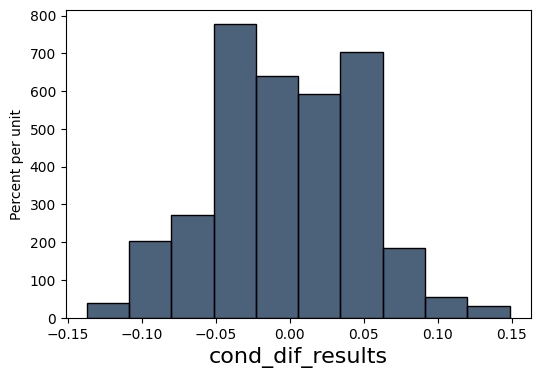

In [5]:
tot_res = ds.Table().with_columns(
    "informational_results", informational_results,
    "funny_results", funny_results,
    "cond_dif_results", cond_dif_results
)
tot_res.select("cond_dif_results").hist() # histogram of differences
print(cond_dif) # original estimate of difference
print(statistics.stdev(tot_res.column("cond_dif_results"))) # sd of differences, should be within +/2 SDs, barely excluded
print(np.quantile(tot_res.column("cond_dif_results"), [.025,.975])) # 95%CI for differences, if 0 excluded, then significant

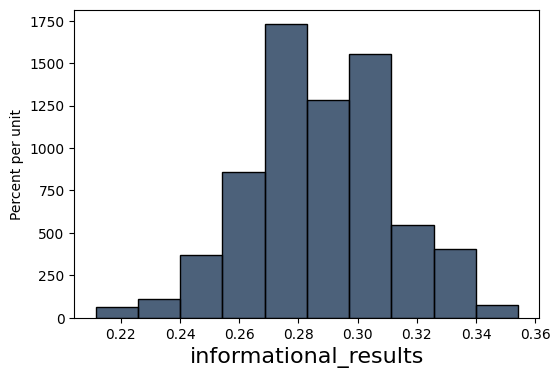

In [6]:
tot_res.select("informational_results").hist() # histogram of informational probs

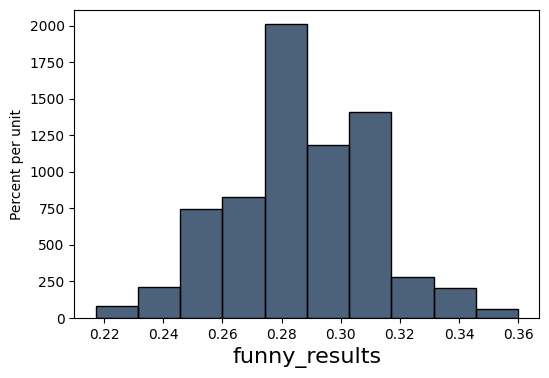

In [7]:
tot_res.select("funny_results").hist() # histogram of funny probs